# Loading data

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [190]:
population_profit_data = pd.read_csv('ex1data1.txt', sep=",", header=None)
population_profit_data.columns = ["Population", "Profit"]

In [191]:
population_profit_data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [192]:
population_profit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


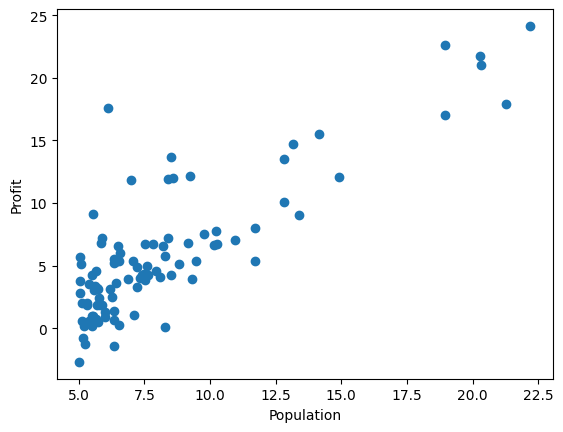

In [193]:
plt.scatter(population_profit_data['Population'], population_profit_data['Profit'])
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

# Univariate linear regression

In [194]:
def compute_cost(X, y, theta) -> float:
    m = y.shape[0]
    J = np.dot((np.dot(X, theta) - y).transpose(), (np.dot(X, theta) - y)) / (2 * m)
    return float(J)

In [195]:
theta_0 = 0
theta_1 = 0

theta = np.resize(np.array([theta_0, theta_1]), (2, 1))
y = np.resize(np.array(population_profit_data['Profit']), (97, 1))

X = np.array([[1, i] for i in population_profit_data['Population']])

In [196]:
if round(compute_cost(X, y, theta), 2) == 32.07:
    print('The function COMPUTE_COST check was SUCCESSFUL!')
else:
    print('Something went terribly wrong...')

The function COMPUTE_COST check was SUCCESSFUL!


In [197]:
def gradient_descent(X, y, theta, alpha, iters):    
    m = y.shape[0]
    J_iters = []
    
    for i in range(iters):
        theta = theta - ((alpha / m) * X.transpose()).dot((X.dot(theta)) - y)
        
        J_iters.append(compute_cost(X, y, theta))
        
    return np.around(theta, 2), J_iters

In [198]:
theta_new, J_iters = gradient_descent(X, y, theta, alpha=0.01, iters=1000)

In [199]:
if theta_new[0] == -3.24 and theta_new[1] == 1.13:
    print('The function GRADIENT_DESCENT check was SUCCESSFUL!')
else:
    print('Something went terribly wrong...')

The function GRADIENT_DESCENT check was SUCCESSFUL!


In [200]:
print(f'The value of the target function now: {compute_cost(X, y, theta_new)}')

The value of the target function now: 4.516418766732299


In [201]:
def h(x, theta_0, theta_1):
    return theta_0 + (theta_1 * x)

X_axes = [min(population_profit_data['Population']), max(population_profit_data['Population'])]
y_axes = [h(min(population_profit_data['Population']), theta_new[0], theta_new[1]),
          h(max(population_profit_data['Population']), theta_new[0], theta_new[1])]

In [202]:
def data_plot_with_linear_regression(data, X, y):
    plt.scatter(data['Population'], data['Profit'])
    plt.plot(X, y, color='g')
    plt.title('Data plot with linear regression')
    plt.xlabel('Population')
    plt.ylabel('Profit')
    plt.show()

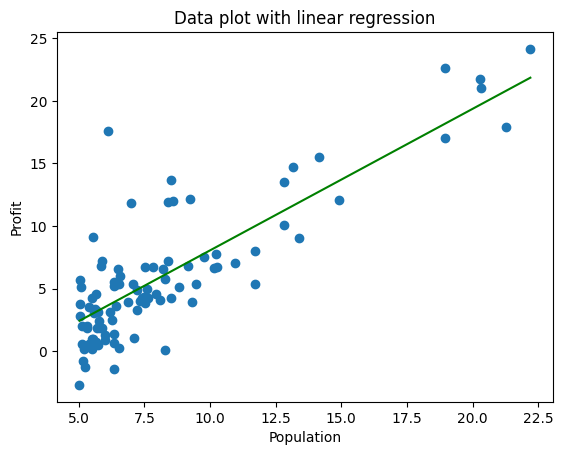

In [203]:
data_plot_with_linear_regression(population_profit_data, X_axes, y_axes)

In [204]:
def plot_dependence_target_func_on_iters(J_iters):
    plt.plot(J_iters)
    plt.title('Plot of the dependence of the target function on the number of iterations')
    plt.xlabel('Iterations')
    plt.ylabel('The values of the target function')
    plt.show()

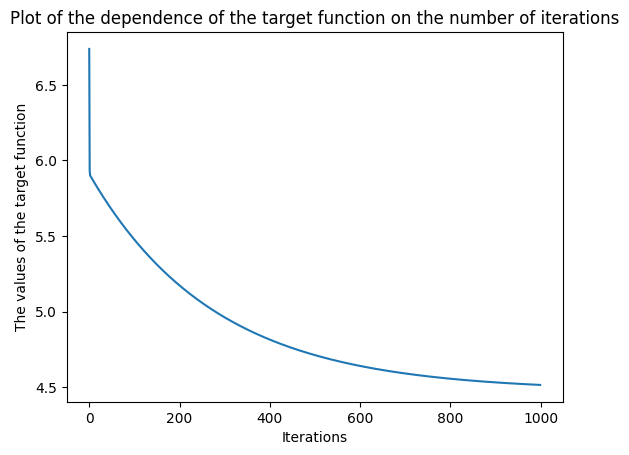

In [205]:
plot_dependence_target_func_on_iters(J_iters)

In [206]:
def experiment_with_different_values(alphas_list, iters_list, X, y, theta):
    values_of_target_function = []
    result_iters = []
    result_alphas = []
    
    for alpha in alphas_list:
        for iters in iters_list:
            _, J_iters = gradient_descent(X, y, theta, alpha, iters)
            
            result_iters.append(iters)
            result_alphas.append(alpha)
            values_of_target_function.append(round(J_iters[-1],2))
            
    results = {'iters': result_iters, 'alpha': result_alphas, 'value of target function': values_of_target_function}
    
    return results

In [207]:
alphas_list = [0.00001, 0.0001, 0.001, 0.01]
iters_list = [10, 100, 1000, 10000]

results_of_experiment = experiment_with_different_values(alphas_list, iters_list, X, y, theta)

table_with_results = pd.DataFrame(data=results_of_experiment)

table_with_results

,iters,alpha,value of target function
0,10,0.00001,31.65
1,100,0.00001,28.10
2,1000,0.00001,10.96
3,10000,0.00001,5.86
4,10,0.00010,28.09
5,100,0.00010,10.93
6,1000,0.00010,5.86
7,10000,0.00010,5.48
8,10,0.00100,10.61
9,100,0.00100,5.86


In [208]:
table_with_results[table_with_results['value of target function'] < 4.516]

,iters,alpha,value of target function
15,10000,0.01,4.48


## The class for the complete solution of this task at different parameters

In [234]:
class LinearRegression:    
    def __init__(self, data, alpha=0.01, iters=1000, thetas=[0,0]):
        self.data = data
        self.alpha = alpha
        self.iters = iters
        self.thetas = thetas
        self.X = None
        self.y = None
        self.J_iters = None
        
        self.parse_data()
        
    def parse_data(self):
        self.thetas = np.resize(np.array([theta for theta in self.thetas]), (len(self.thetas), 1))
        self.y = np.resize(np.array(self.data[self.data.columns[-1]]), (self.data.shape[0], 1))
        
        self.X = np.array(self.data[self.data.columns[:-1]])
        ones_vector = np.resize(np.array([1 for _ in self.data.columns[-1]]), (self.data.shape[0], 1))               
        self.X = np.hstack((ones_vector,self.X))
        
        return self.X, self.y
        
    def compute_cost(self) -> float:
        m = self.y.shape[0]
        J = np.dot((np.dot(self.X, self.thetas) - self.y).transpose(), (np.dot(self.X, self.thetas) - self.y)) / (2 * m)
        return float(J)
        
    def __gradient_descent(self):    
        m = self.y.shape[0]
        J_iters = []
        
        for i in range(self.iters):
            self.thetas = self.thetas - ((self.alpha / m) * self.X.transpose()).dot((self.X.dot(self.thetas)) - self.y)
            J_iters.append(self.compute_cost())

        self.thetas = np.around(self.thetas, 2) 
        self.J_iters = J_iters
        
    def __linear_function(self, X_point):
        return self.thetas[0] + (self.thetas[1] * X_point)
    
    def __get_points_for_linear_function(self):
        X_axes = [min(self.data.iloc[:, 0]), max(self.data.iloc[:, 0])]
        y_axes = [self.__linear_function(X_axes[0]),
                  self.__linear_function(X_axes[1])]
        return X_axes, y_axes
    
    def data_plot_with_linear_regression(self):
        if len(self.thetas) == 2:
            X, y = self.__get_points_for_linear_function()
            plt.scatter(self.data.iloc[:, 0], self.data[self.data.columns[-1]])
            plt.plot(X, y, color='g')
            plt.title('Data plot with linear regression')
            plt.xlabel('Data')
            plt.ylabel('Target')
            plt.show()
        else:
            print('Sorry, can\'t show data plot with linear regression, because it\'s multiple regression.')
    
    def __plot_dependence_target_func_on_iters(self):
        plt.plot(self.J_iters)
        plt.title('Plot of the dependence of the target function on the number of iterations')
        plt.xlabel('Iterations')
        plt.ylabel('The values of the target function')
        plt.show()
        
    def get_solution(self):
        self.__gradient_descent()
        print(f'The final value of the target function: {self.J_iters[-1]}')
        
        self.data_plot_with_linear_regression()
        self.__plot_dependence_target_func_on_iters()
            
        return

## Task solution with alpha = 0.001

The final value of the target function: 5.480269332020323


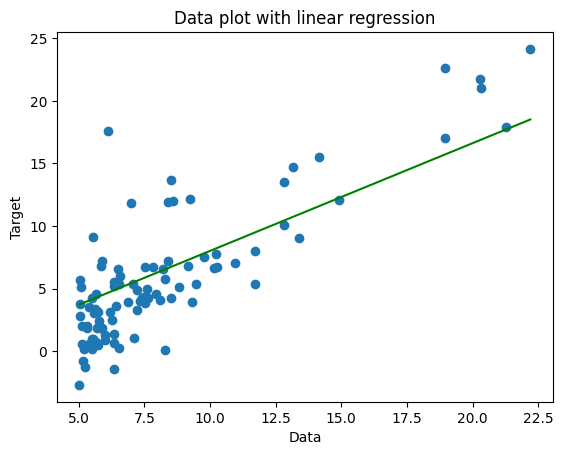

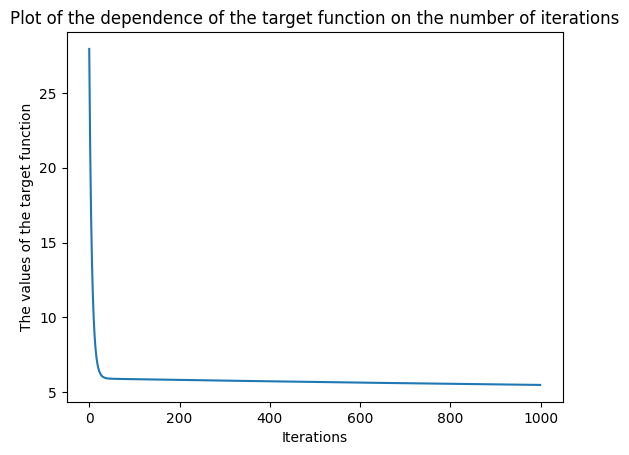

In [235]:
LinearRegression(data=population_profit_data, alpha=0.001, iters=1000, thetas = [0, 0]).get_solution()

## Task solution with alpha = 0.05

The final value of the target function: nan


/var/folders/w7/yf86m2f15hx9mk6gjqvyjsm00000gn/T/ipykernel_4937/2032723838.py:33: RuntimeWarning: invalid value encountered in subtract
  self.thetas = self.thetas - ((self.alpha / m) * self.X.transpose()).dot((self.X.dot(self.thetas)) - self.y)


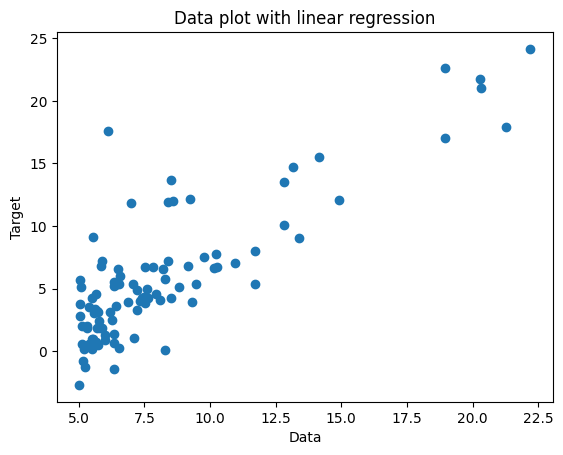

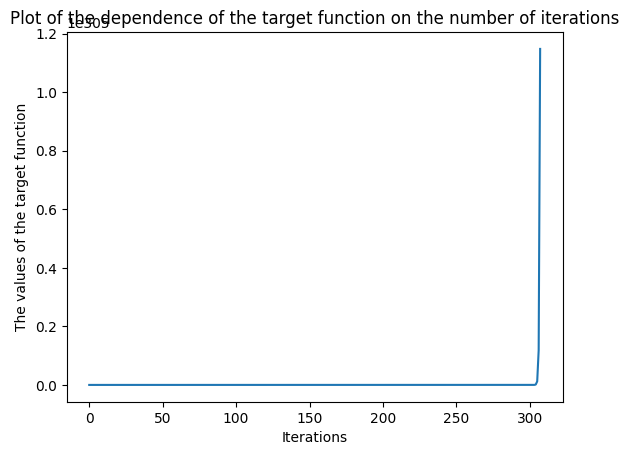

In [236]:
#ToDo: see what went wrong

LinearRegression(data=population_profit_data, alpha=0.05, iters=1000, thetas=[0, 0]).get_solution()

## Multiple linear regression

In [237]:
price_data = pd.read_csv('ex1data2.txt', sep=",", header=None)
price_data.columns = ["Size", "Bedrooms", "Price"]

In [238]:
price_data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Let's normalize the data

In [239]:
mean_size = np.mean(price_data['Size'])
mean_bedrooms = np.mean(price_data['Bedrooms'])
mean_price = np.std(price_data['Price'])

std_size = np.std(price_data['Size'])
std_bedrooms = np.std(price_data['Bedrooms'])
std_price = np.std(price_data['Price'])

for i in range(price_data.shape[0]):
    price_data['Size'][i] = (price_data['Size'][i] - mean_size) / std_size
    price_data['Bedrooms'][i] = (price_data['Bedrooms'][i] - mean_bedrooms) / std_bedrooms
    price_data['Price'][i] = (price_data['Price'][i] - mean_price) / std_price

/var/folders/w7/yf86m2f15hx9mk6gjqvyjsm00000gn/T/ipykernel_4937/2563611029.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data['Bedrooms'][i] = (price_data['Bedrooms'][i] - mean_bedrooms) / std_bedrooms
/var/folders/w7/yf86m2f15hx9mk6gjqvyjsm00000gn/T/ipykernel_4937/2563611029.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data['Price'][i] = (price_data['Price'][i] - mean_price) / std_price


In [240]:
price_data.head()

,Size,Bedrooms,Price
0,0.131415,-0.226093,2.232755
1,-0.509641,-0.226093,1.666881
2,0.507909,-0.226093,1.982962
3,-0.743677,-1.554392,0.875467
4,1.271071,1.102205,3.364502


The final value of the target function: 0.1335417916507186
Sorry, can't show data plot with linear regression, because it's multiple regression.


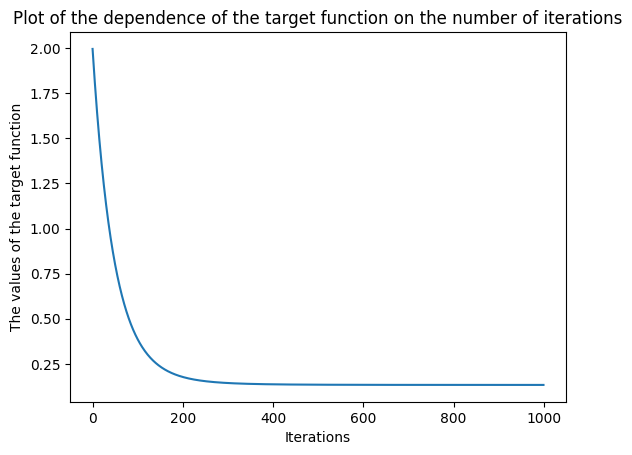

In [241]:
LinearRegression(data=price_data, alpha=0.01, iters=1000, thetas = [0, 0, 0]).get_solution()

## Task solution with alpha = 0.05, iters = 1000

The final value of the target function: 0.13352749098554292
Sorry, can't show data plot with linear regression, because it's multiple regression.


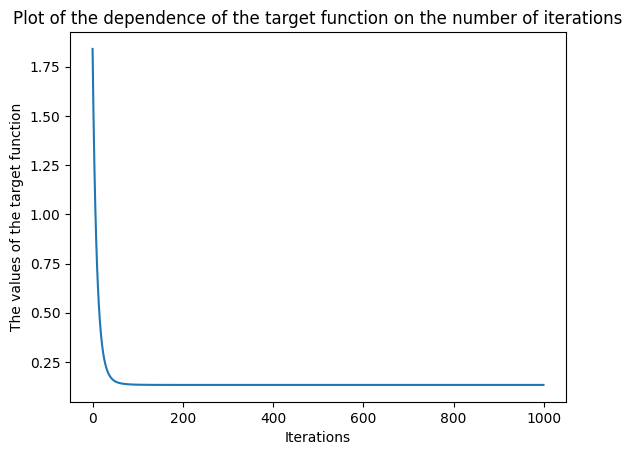

In [242]:
LinearRegression(data=price_data, alpha=0.05, iters=1000, thetas = [0, 0, 0]).get_solution()

## Linear Regression in sklearn

In [243]:
from sklearn import linear_model
model_1 = linear_model.LinearRegression()
model_1.fit(X, y)

LinearRegression()

In [244]:
f = model_1.predict(X)

In [245]:
def data_plot_with_linear_regression(data, X, y):
    plt.scatter(data['Population'], data['Profit'])
    plt.plot(data['Population'], y, color='g')
    plt.title('Data plot with linear regression')
    plt.xlabel('Population')
    plt.ylabel('Profit')
    plt.show()

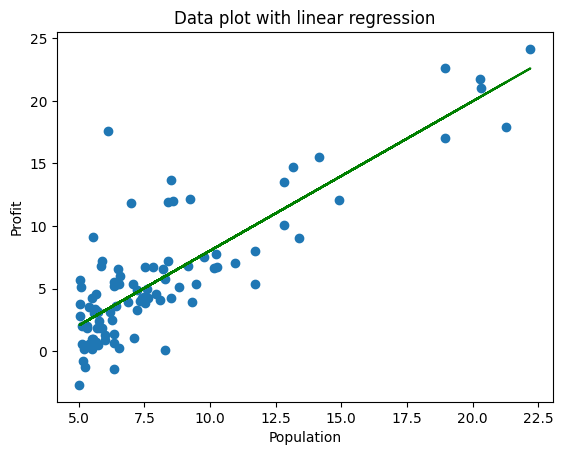

In [246]:
data_plot_with_linear_regression(population_profit_data, X, f)

In [248]:
model_2 = linear_model.LinearRegression()
X, y = LinearRegression(price_data).parse_data()
model_2.fit(X, y)

LinearRegression()

In [249]:
f = model_2.predict(X)